In [1]:
import pandas as pd
import numpy as np
from numpy import random
import sklearn
from sklearn import metrics
import statsmodels.api as sm 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from random import randint

In [2]:
d = pd.read_csv('household.csv')

C:\Users\renat\AppData\Local\Temp\ipykernel_15732\1127986844.py:1: DtypeWarning: Columns (3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv('household.csv')


In [3]:
d['date_time'] = pd.to_datetime(d['Date'] + ' ' + d['Time'])

In [4]:
d['Global_active_power'] = pd.to_numeric(d['Global_active_power'], errors='coerce')


In [5]:
d['date_time'] = pd.to_datetime(d['date_time']) 

In [6]:
print(d)
data = d
d = data

         Unnamed: 0        Date      Time  Global_active_power  \
0                 0  16/12/2006  17:24:00                4.216   
1                 1  16/12/2006  17:25:00                5.360   
2                 2  16/12/2006  17:26:00                5.374   
3                 3  16/12/2006  17:27:00                5.388   
4                 4  16/12/2006  17:28:00                3.666   
...             ...         ...       ...                  ...   
2075254     2075254  26/11/2010  20:58:00                0.946   
2075255     2075255  26/11/2010  20:59:00                0.944   
2075256     2075256  26/11/2010  21:00:00                0.938   
2075257     2075257  26/11/2010  21:01:00                0.934   
2075258     2075258  26/11/2010  21:02:00                0.932   

        Global_reactive_power  Voltage Global_intensity Sub_metering_1  \
0                       0.418  234.840           18.400          0.000   
1                       0.436  233.630           23.000    

In [7]:
# Create new columns for year, quarter, month, and day
d['year'] = d['date_time'].apply(lambda x: x.year)
d['quarter'] = d['date_time'].apply(lambda x: x.quarter)
d['month'] = d['date_time'].apply(lambda x: x.month)
d['day'] = d['date_time'].apply(lambda x: x.day)

In [8]:
# Keep only the columns 'date_time', 'Global_active_power', 'year', 'quarter', 'month', 'day'
d = d.loc[:,['date_time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','year','quarter','month','day']]
#d = d.set_index('date_time')
#d = d.reset_index
print(d)


                  date_time  Global_active_power Global_reactive_power  \
0       2006-12-16 17:24:00                4.216                 0.418   
1       2006-12-16 17:25:00                5.360                 0.436   
2       2006-12-16 17:26:00                5.374                 0.498   
3       2006-12-16 17:27:00                5.388                 0.502   
4       2006-12-16 17:28:00                3.666                 0.528   
...                     ...                  ...                   ...   
2075254 2010-11-26 20:58:00                0.946                   0.0   
2075255 2010-11-26 20:59:00                0.944                   0.0   
2075256 2010-11-26 21:00:00                0.938                   0.0   
2075257 2010-11-26 21:01:00                0.934                   0.0   
2075258 2010-11-26 21:02:00                0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.400          0

In [9]:
# Sort the data by date_time in ascending order
d.sort_values('date_time', inplace=True, ascending=True)

In [10]:
# Reset the index of the data
d = d.reset_index(drop=True)

In [11]:
print(d)


                  date_time  Global_active_power Global_reactive_power  \
0       2006-12-16 17:24:00                4.216                 0.418   
1       2006-12-16 17:25:00                5.360                 0.436   
2       2006-12-16 17:26:00                5.374                 0.498   
3       2006-12-16 17:27:00                5.388                 0.502   
4       2006-12-16 17:28:00                3.666                 0.528   
...                     ...                  ...                   ...   
2075254 2010-12-11 23:55:00                0.690                 0.062   
2075255 2010-12-11 23:56:00                0.688                  0.06   
2075256 2010-12-11 23:57:00                0.688                 0.062   
2075257 2010-12-11 23:58:00                0.688                 0.062   
2075258 2010-12-11 23:59:00                0.688                 0.064   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.400          0

In [12]:
d['weekday'] = d['date_time'].apply(lambda x: x.weekday() < 5).astype(int)
print(d)

                  date_time  Global_active_power Global_reactive_power  \
0       2006-12-16 17:24:00                4.216                 0.418   
1       2006-12-16 17:25:00                5.360                 0.436   
2       2006-12-16 17:26:00                5.374                 0.498   
3       2006-12-16 17:27:00                5.388                 0.502   
4       2006-12-16 17:28:00                3.666                 0.528   
...                     ...                  ...                   ...   
2075254 2010-12-11 23:55:00                0.690                 0.062   
2075255 2010-12-11 23:56:00                0.688                  0.06   
2075256 2010-12-11 23:57:00                0.688                 0.062   
2075257 2010-12-11 23:58:00                0.688                 0.062   
2075258 2010-12-11 23:59:00                0.688                 0.064   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.400          0

In [13]:
df = d
df = df.set_index('date_time')
df = df.resample('10min').mean()
print(df)

                     Global_active_power  Sub_metering_3    year  quarter  \
date_time                                                                   
2006-12-16 17:20:00             4.587333       16.833333  2006.0      4.0   
2006-12-16 17:30:00             4.252200       16.800000  2006.0      4.0   
2006-12-16 17:40:00             4.721600       16.900000  2006.0      4.0   
2006-12-16 17:50:00             3.476200       16.900000  2006.0      4.0   
2006-12-16 18:00:00             4.690400       16.900000  2006.0      4.0   
...                                  ...             ...     ...      ...   
2010-12-11 23:10:00             0.386400        0.000000  2010.0      4.0   
2010-12-11 23:20:00             0.961200        0.000000  2010.0      4.0   
2010-12-11 23:30:00             0.744200        0.000000  2010.0      4.0   
2010-12-11 23:40:00             0.689400        0.000000  2010.0      4.0   
2010-12-11 23:50:00             0.690000        0.000000  2010.0      4.0   

C:\Users\renat\AppData\Local\Temp\ipykernel_15732\4287146933.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('10min').mean()


In [14]:
d = d.set_index('date_time')
#d = d.resample('H').mean()
print(d)

                     Global_active_power Global_reactive_power  Voltage  \
date_time                                                                 
2006-12-16 17:24:00                4.216                 0.418  234.840   
2006-12-16 17:25:00                5.360                 0.436  233.630   
2006-12-16 17:26:00                5.374                 0.498  233.290   
2006-12-16 17:27:00                5.388                 0.502  233.740   
2006-12-16 17:28:00                3.666                 0.528  235.680   
...                                  ...                   ...      ...   
2010-12-11 23:55:00                0.690                 0.062   244.16   
2010-12-11 23:56:00                0.688                  0.06   243.82   
2010-12-11 23:57:00                0.688                 0.062    244.2   
2010-12-11 23:58:00                0.688                 0.062   244.21   
2010-12-11 23:59:00                0.688                 0.064   244.65   

                    Glob

In [15]:
import scipy.stats as stats
# Calculate the test statistics and p-value
stat, p = stats.normaltest(df.Global_active_power)

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Set the significance level
alpha = 0.05

# Make a decision on the test result
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=nan, p=nan
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: nan
Skewness of normal distribution: nan


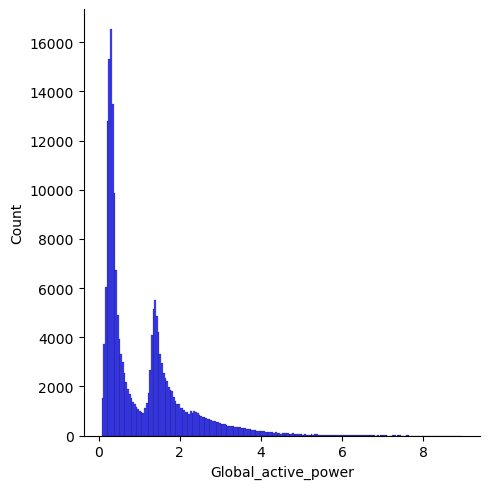

In [16]:
import seaborn as sns
sns.displot(df.Global_active_power,color='blue')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Global_active_power)))

In [17]:
df = df.reset_index()
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna(subset=['Global_active_power'])

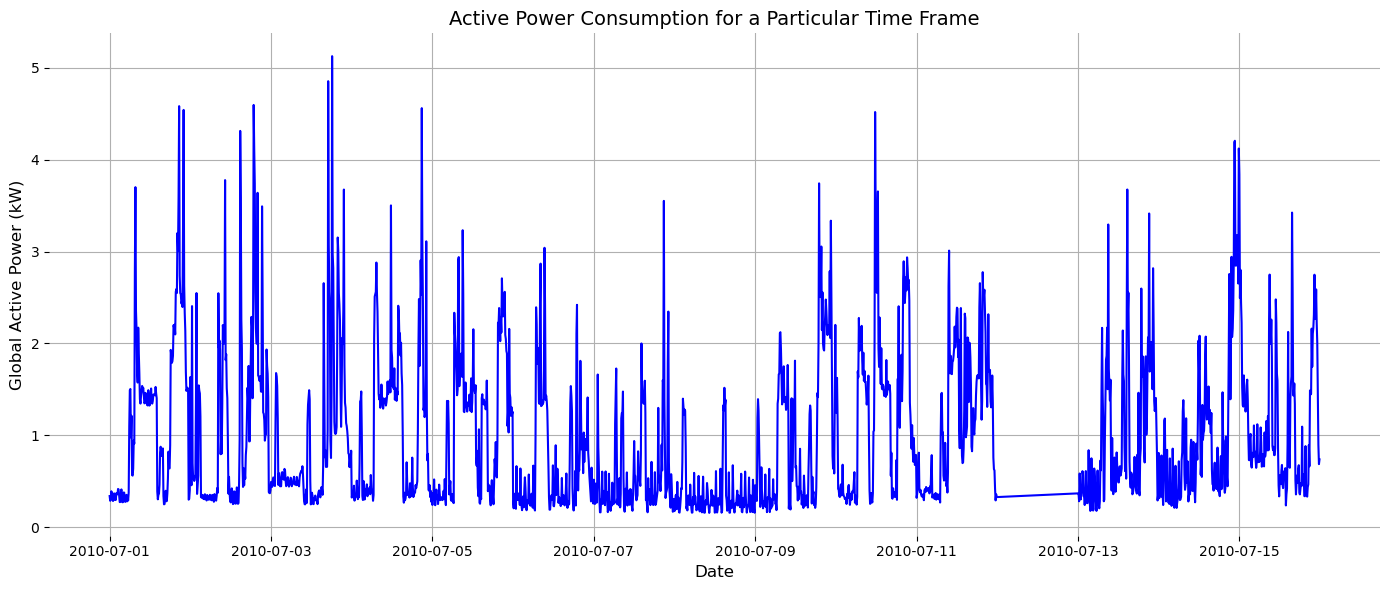

In [18]:
import matplotlib.pyplot as plt
data1 = df[(df.date_time >= '2010-07-01') & (df.date_time < '2010-7-16')]

plt.figure(figsize=(14,6))
plt.plot(data1.date_time, data1.Global_active_power, color='blue')
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

                      count         mean       std       min        25%  \
Global_active_power  2016.0     0.979437  0.811390     0.154     0.3416   
Sub_metering_3       2016.0     5.888029  7.730553     0.600     0.6000   
year                 2016.0  2010.000000  0.000000  2010.000  2010.0000   
quarter              2016.0     3.000000  0.000000     3.000     3.0000   
month                2016.0     7.000000  0.000000     7.000     7.0000   
day                  2016.0     7.714286  4.334147     1.000     4.0000   
weekday              2016.0     0.714286  0.451866     0.000     0.0000   

                           50%         75%        max  
Global_active_power     0.6389     1.44315     5.1268  
Sub_metering_3          0.7000    13.67500    25.3000  
year                 2010.0000  2010.00000  2010.0000  
quarter                 3.0000     3.00000     3.0000  
month                   7.0000     7.00000     7.0000  
day                     7.5000    11.00000    15.0000  
weekday

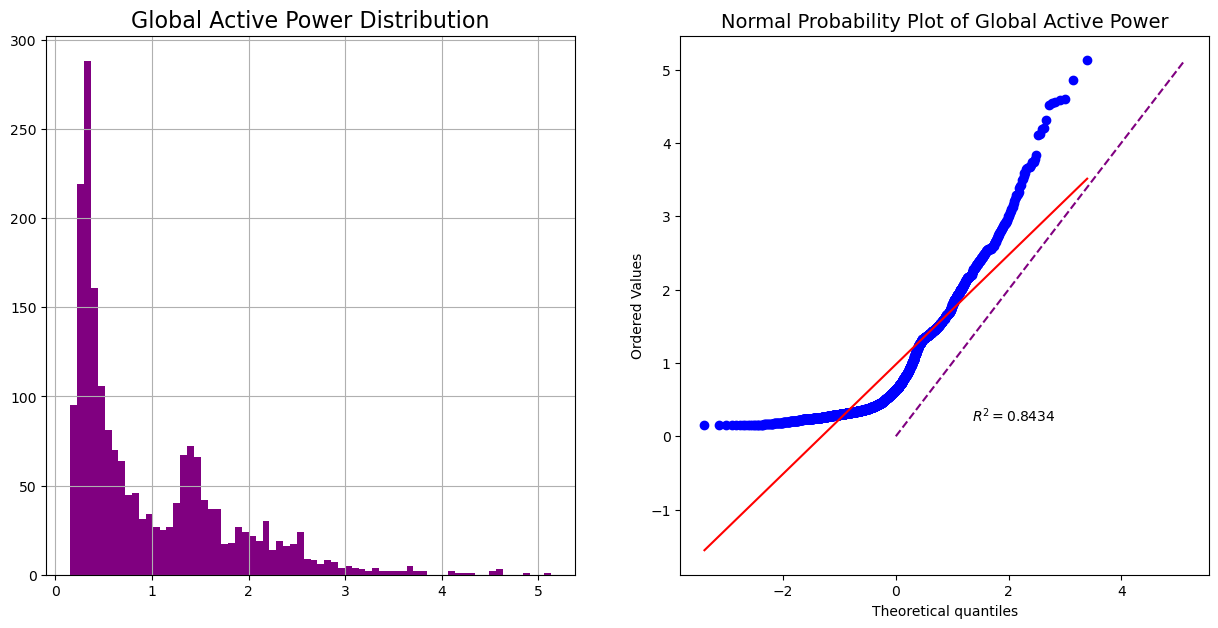

In [19]:
# Plotting the histogram and normal probability plot for 'Global_active_power' column
plt.figure(figsize=(15,7))

# Histogram of 'Global_active_power' column
plt.subplot(1,2,1)
data1['Global_active_power'].hist(bins=70, color='purple')
plt.title('Global Active Power Distribution', fontsize=16)

# Normal Probability Plot of 'Global_active_power' column
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(data1['Global_active_power'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(data1['Global_active_power'])], [0, max(data1['Global_active_power'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot of Global Active Power', fontsize=14)


# Printing the summary statistics of 'Global_active_power' column
print(data1.describe().T)

In [20]:
data1=df.loc[:,['date_time','Global_active_power']]
data1.set_index('date_time',inplace=True)

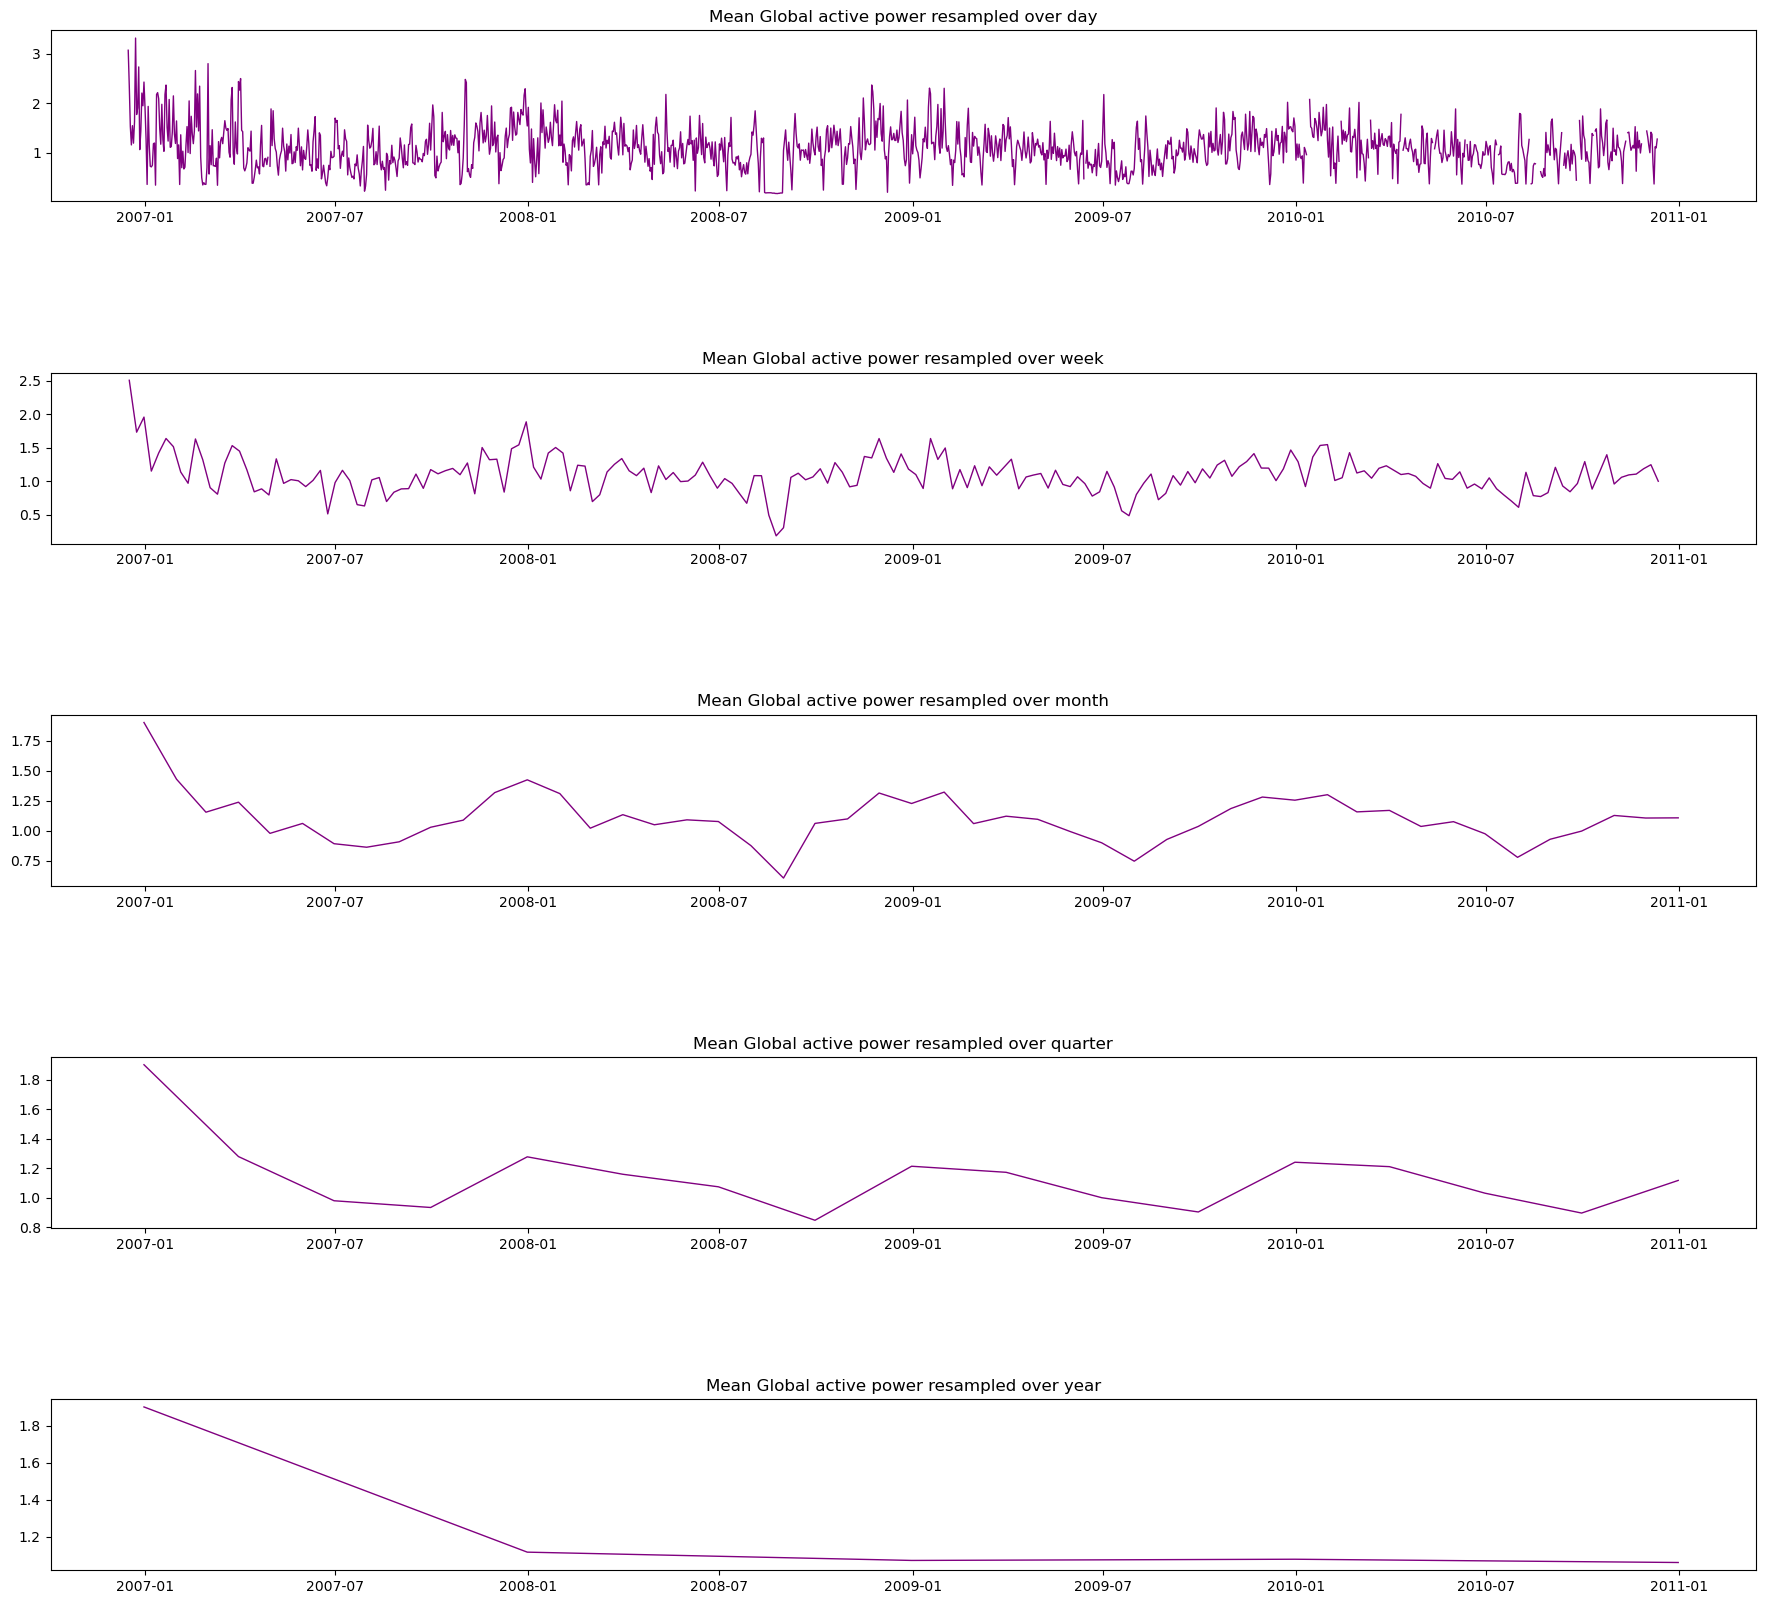

In [21]:
# Create a figure with specified size
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
# Plot the resampled mean of Global_active_power over day with different color
ax1.plot(data1['Global_active_power'].resample('D').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax1.set_title('Mean Global active power resampled over day')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')

# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax2.plot(data1['Global_active_power'].resample('W').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax2.set_title('Mean Global active power resampled over week')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')

# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax3.plot(data1['Global_active_power'].resample('M').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax3.set_title('Mean Global active power resampled over month')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax4.plot(data1['Global_active_power'].resample('Q').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax4.set_title('Mean Global active power resampled over quarter')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax5.plot(data1['Global_active_power'].resample('A').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax5.set_title('Mean Global active power resampled over year')
# Set major tick parameters for the subplot
ax5.tick_params(axis='both', which='major')

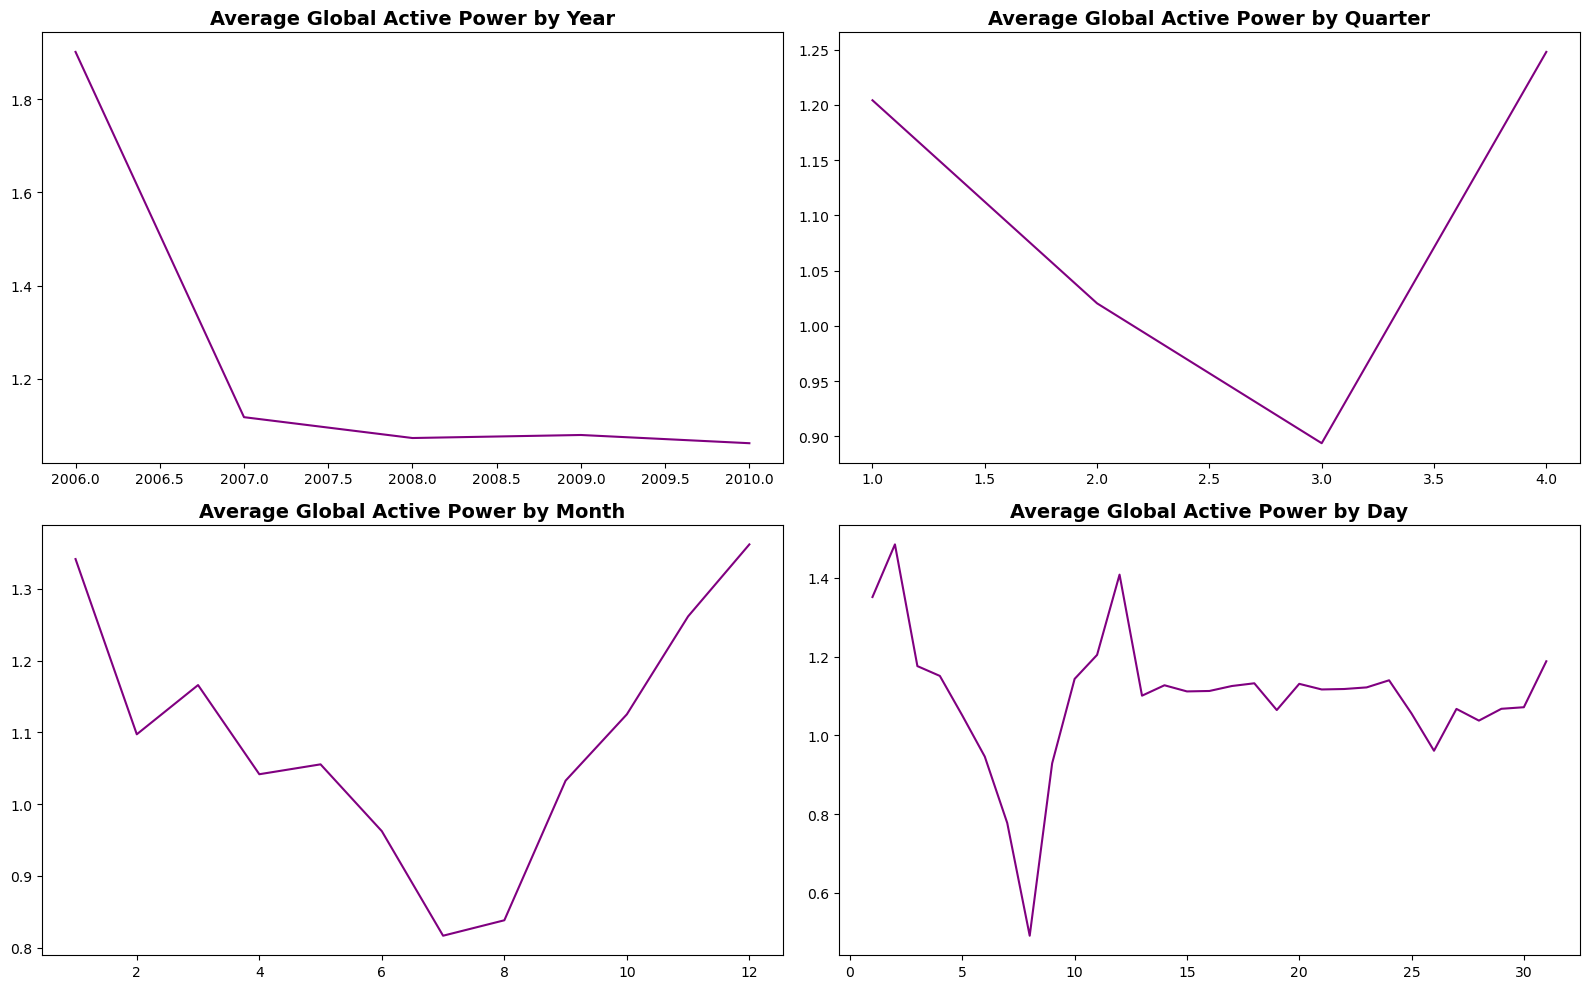

In [22]:
# Create a figure with 2 rows and 2 columns and set its size to 14x8
plt.figure(figsize=(16,10))

# First subplot in the first row, first column
plt.subplot(2,2,1)
# Group data by year and take the mean of the 'Global_active_power' column
grouped_by_year = df.groupby('year').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by year with red color
grouped_by_year.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Year' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')

# Second subplot in the first row, second column
plt.subplot(2,2,2)
# Group data by quarter and take the mean of the 'Global_active_power' column
grouped_by_quarter = df.groupby('quarter').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by quarter with blue color
grouped_by_quarter.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Quarter' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Quarter', fontsize=14, fontweight='bold')

# Third subplot in the second row, first column
plt.subplot(2,2,3)
# Group data by month and take the mean of the 'Global_active_power' column
grouped_by_month = df.groupby('month').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by month with purple color
grouped_by_month.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Month' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')

# Fourth subplot in the second row, second column
plt.subplot(2,2,4)
# Group data by day and take the mean of the 'Global_active_power' column
grouped_by_day = df.groupby('day').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by day with green color
grouped_by_day.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Day' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')

# Use tight_layout to adjust the subplots so that they fit into the figure area
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    # Plot original timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='purple',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='cyan', label = 'Rolling Std')

    # Add legend
    plt.legend(loc='best')
    # Add title
    plt.title('Rolling Mean & Standard Deviation of Global Active Power')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

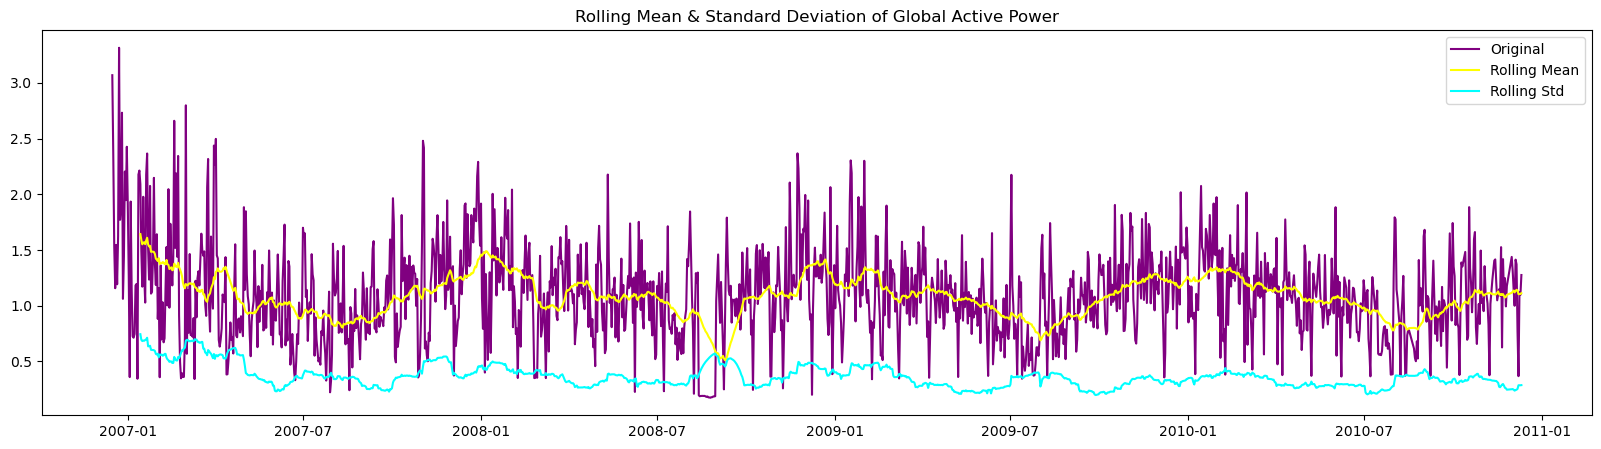

<Results of Dickey-Fuller Test>
Test Statistic                -8.320991e+00
p-value                        3.573086e-13
#Lags Used                     9.000000e+00
Number of Observations Used    1.423000e+03
Critical Value (1%)           -3.434954e+00
Critical Value (5%)           -2.863573e+00
Critical Value (10%)          -2.567852e+00
dtype: float64


In [118]:
data1 = data1.resample('D').mean()
test_stationarity(data1.Global_active_power.dropna())

In [25]:
from sklearn.preprocessing import MinMaxScaler
#df= df.rolling(window=30)
dataset = df.Global_active_power.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1

#scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

#dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)

train_size = int(len(dataset) * 0.65)
valid_size = int((len(dataset) - train_size)*(3/7))
train,valid,test = dataset[0:train_size,:], dataset[train_size:train_size+valid_size,:], dataset[train_size+valid_size:,:]


In [26]:
print(dataset)

[[4.587333]
 [4.2522  ]
 [4.7216  ]
 ...
 [0.7442  ]
 [0.6894  ]
 [0.69    ]]


In [73]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [74]:
# reshape into X=t and Y=t+1
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_valid, Y_valid = create_dataset(valid, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [75]:
X_train.shape

(133215, 1)

In [76]:
X_valid.shape

(30740, 1)

In [77]:
X_test.shape

(40989, 1)

In [78]:
Y_train.shape


(133215,)

In [79]:
X_train.shape

(133215, 1)

In [152]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
from sklearn.metrics import r2_score as r2
# ebm = ExplainableBoostingRegressor(max_bins=300, max_interaction_bins=40, 
#                                    interactions=100, validation_size=0.15, 
#                                    outer_bags=10, inner_bags=4, learning_rate=0.03, 
#                                    max_rounds=5000, early_stopping_rounds=50, 
#                                    early_stopping_tolerebm = ance=0.0001, min_samples_leaf=3, max_leaves=5)
ebm = ExplainableBoostingRegressor(outer_bags=5,learning_rate=0.3,max_leaves=8)
ebm.fit(X_train, Y_train)

ebm_1 = ExplainableBoostingRegressor(outer_bags=1,learning_rate=0.01,max_leaves=4)
ebm_1.fit(X_train, Y_train)
ebm_2 = ExplainableBoostingRegressor(outer_bags=2,learning_rate=0.05,max_leaves=5)
ebm_2.fit(X_train, Y_train)
ebm_3 = ExplainableBoostingRegressor(outer_bags=3,learning_rate=0.1,max_leaves=6)
ebm_3.fit(X_train, Y_train)
ebm_4 = ExplainableBoostingRegressor(outer_bags=4,learning_rate=0.2,max_leaves=7)
ebm_4.fit(X_train, Y_train)

ExplainableBoostingRegressor(learning_rate=0.2, max_leaves=7, outer_bags=4)

Best Model
R2-score Validation best 0.7491998132758834
Model 2
R2-score Validation 0.748942995086977
Model 3
R2-score Validation 0.7490997674920139
Model 4
R2-score Validation 0.7490018892793403
Model 5
R2-score Validation 0.7489837778954017


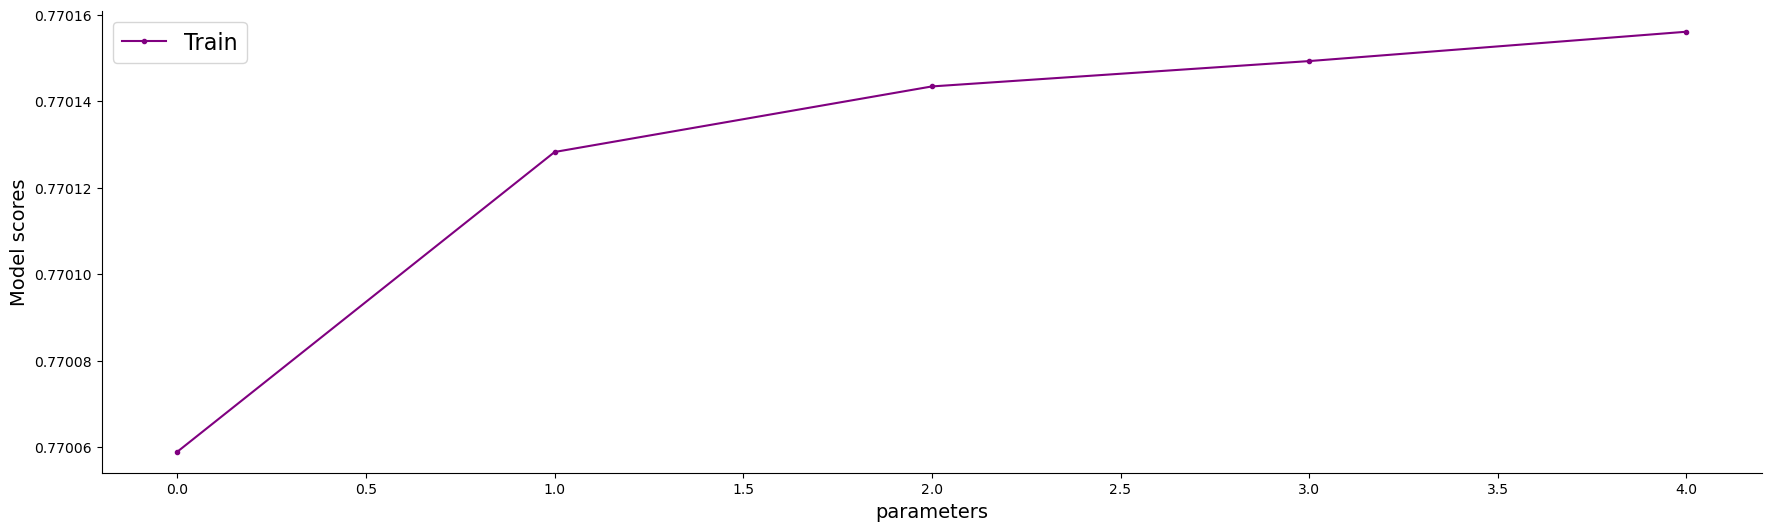

In [167]:
# make predictions
valid_predict = ebm.predict(X_valid)
test_predict = ebm.predict(X_test)

valid_predict_1 = ebm_1.predict(X_valid)
test_predict_1 = ebm_1.predict(X_test)

valid_predict_2 = ebm_2.predict(X_valid)
test_predict_2 = ebm_2.predict(X_test)

valid_predict_3 = ebm_3.predict(X_valid)
test_predict_3 = ebm_3.predict(X_test)

valid_predict_4 = ebm_4.predict(X_valid)
test_predict_4 = ebm_4.predict(X_test)

print('Best Model')
print('R2-score Validation best',r2(Y_valid,valid_predict_1))
print('Model 2')
print('R2-score Validation',r2(Y_valid,valid_predict))
print('Model 3')
print('R2-score Validation',r2(Y_valid,valid_predict_2))
print('Model 4')
print('R2-score Validation',r2(Y_valid,valid_predict_3))
print('Model 5')
print('R2-score Validation',r2(Y_valid,valid_predict_4))
train_scores = [ebm_1.score(X_train, Y_train),
                ebm_2.score(X_train, Y_train),
                ebm_3.score(X_train, Y_train),
                ebm_4.score(X_train, Y_train),
                ebm.score(X_train, Y_train)]

valid_scores = [ebm_1.score(X_valid, Y_valid),
                ebm_2.score(X_valid, Y_valid),
                ebm_3.score(X_valid, Y_valid),
                ebm_4.score(X_valid, Y_valid),
                ebm.score(X_valid, Y_valid)]

valid_scores_r= [r2(Y_valid,valid_predict_1),
               r2(Y_valid,valid_predict_2), 
               r2(Y_valid,valid_predict_3),
               r2(Y_valid,valid_predict_4),
               r2(Y_valid,valid_predict)]
aa=[x for x in range(5)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, train_scores, marker='.', label="Train", color='purple')

# Plotting the predicted values in green with a solid line
#plt.plot(aa, valid_scores, marker='.', label="Valid", color='black')


# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Model scores', size=14)

# Labeling the x-axis
plt.xlabel('parameters', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

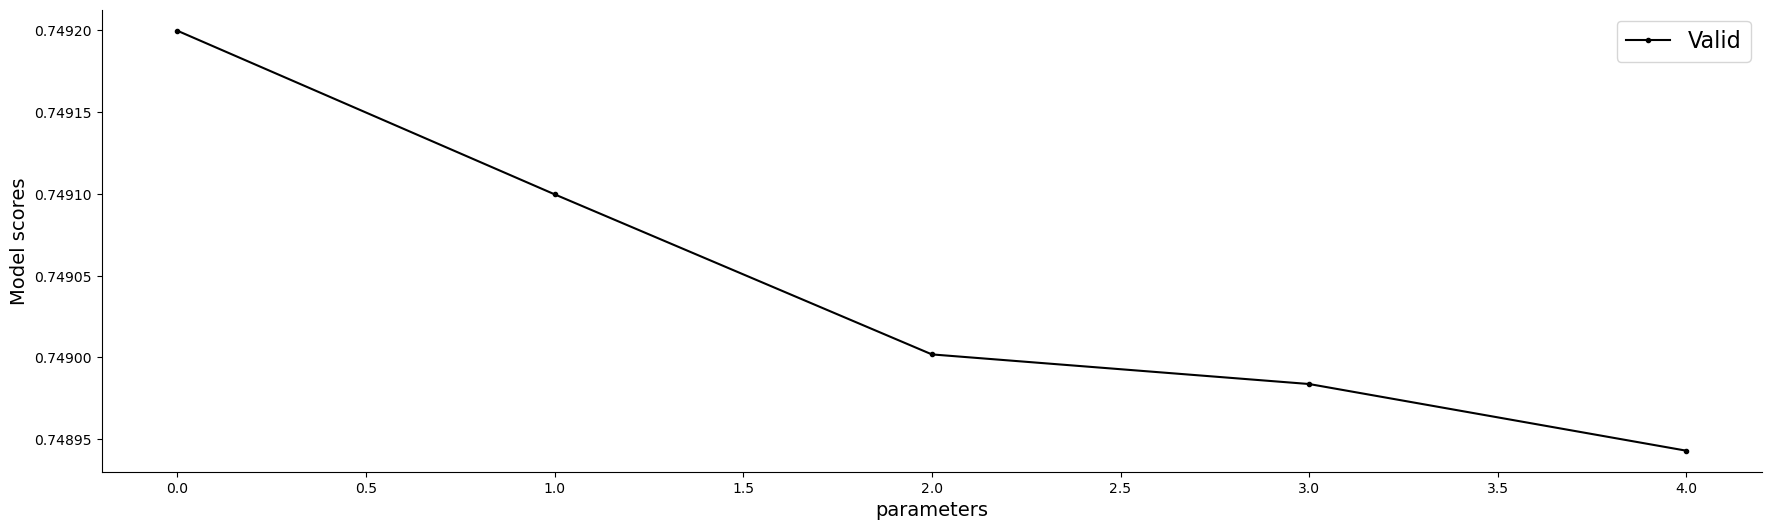

In [168]:
aa=[x for x in range(5)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
#plt.plot(aa, train_scores, marker='.', label="Train", color='purple')

# Plotting the predicted values in green with a solid line
plt.plot(aa, valid_scores, marker='.', label="Valid", color='black')


# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Model scores', size=14)

# Labeling the x-axis
plt.xlabel('parameters', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

Best Model
R2-score Test Best 0.7289309495769927
Model 2
R2-score Test  0.7283949721485815
Model 3
R2-score Test  0.7286612486459121
Model 4
R2-score Test  0.7285625674762355
Model 5
R2-score Test  0.7284707403554297


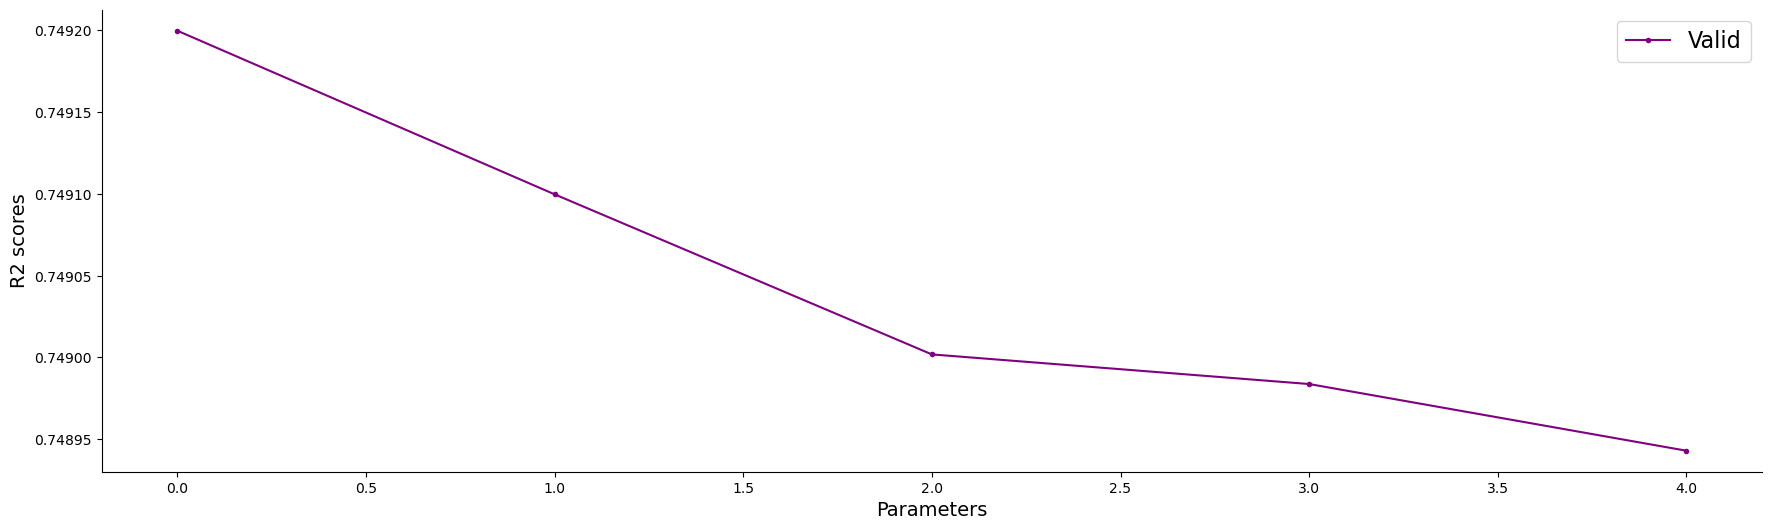

In [169]:
print('Best Model')
print('R2-score Test Best',r2(Y_test,test_predict_1))
print('Model 2')
print('R2-score Test ',r2(Y_test,test_predict))
print('Model 3')
print('R2-score Test ',r2(Y_test,test_predict_2))
print('Model 4')
print('R2-score Test ',r2(Y_test,test_predict_3))
print('Model 5')
print('R2-score Test ',r2(Y_test,test_predict_4))

Test_scores_r= [r2(Y_test,test_predict_1),
               r2(Y_test,test_predict_2), 
               r2(Y_test,test_predict_3),
               r2(Y_test,test_predict_4),
               r2(Y_test,test_predict)]
aa=[x for x in range(5)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, valid_scores_r, marker='.', label="Valid", color='purple')

# Plotting the predicted values in green with a solid line
#plt.plot(aa, Test_scores_r, marker='.', label="Test", color='black')


# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('R2 scores', size=14)

# Labeling the x-axis
plt.xlabel('Parameters', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

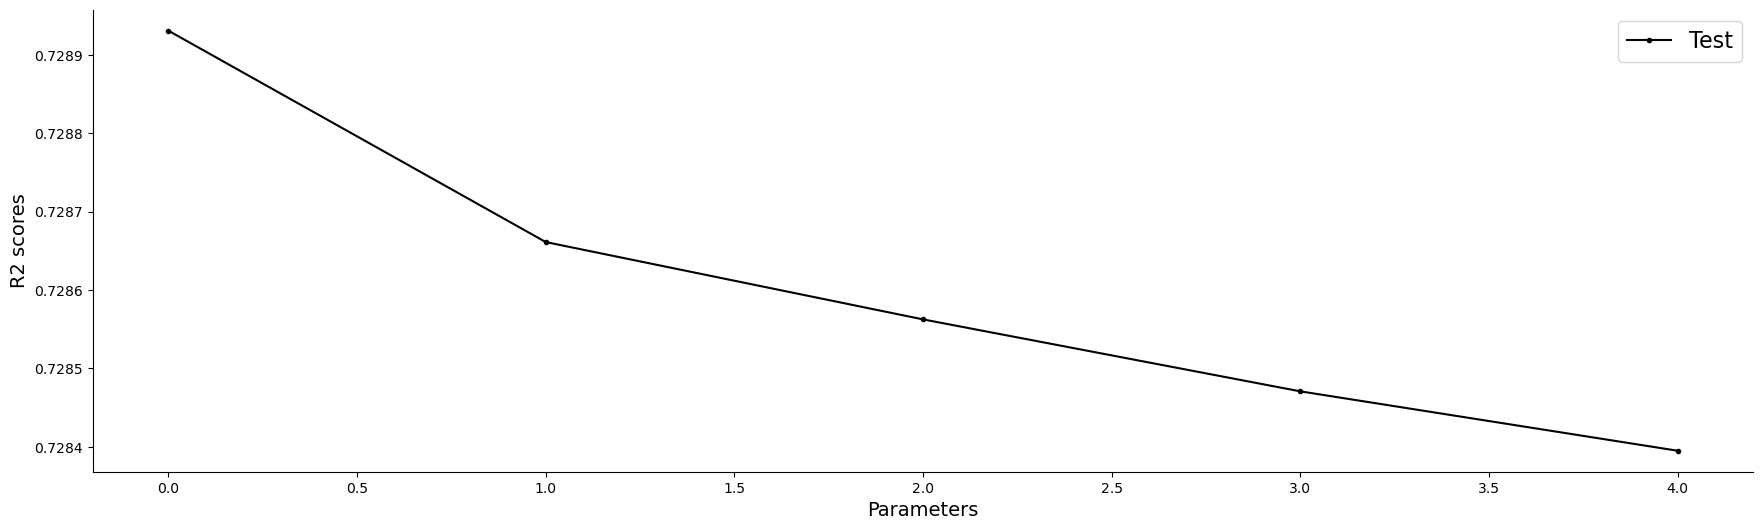

In [170]:
aa=[x for x in range(5)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
#plt.plot(aa, valid_scores_r, marker='.', label="Valid", color='purple')

# Plotting the predicted values in green with a solid line
plt.plot(aa, Test_scores_r, marker='.', label="Test", color='black')


# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('R2 scores', size=14)

# Labeling the x-axis
plt.xlabel('Parameters', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [83]:
from interpret import show

show(ebm.explain_global())

<!-- http://127.0.0.1:7001/2628646419568/ -->

In [148]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Best Model')
print('Valid Mean Absolute Error Best:', mean_absolute_error(Y_valid, valid_predict_1))
print('Valid Root Mean Squared Error Best:',np.sqrt(mean_squared_error(Y_valid, valid_predict_1)))
print('Test Mean Absolute Error Best:', mean_absolute_error(Y_test, test_predict_1))
print('Test Root Mean Squared Error Best:',np.sqrt(mean_squared_error(Y_test, test_predict_1)))
print('Model 2')
print('Valid Mean Absolute Error:', mean_absolute_error(Y_valid, valid_predict))
print('Valid Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_valid, valid_predict)))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict)))
print('Model 3')
print('Valid Mean Absolute Error:', mean_absolute_error(Y_valid, valid_predict_2))
print('Valid Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_valid, valid_predict_2)))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict_2))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict_2)))
print('Model 4')
print('Valid Mean Absolute Error:', mean_absolute_error(Y_valid, valid_predict_3))
print('Valid Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_valid, valid_predict_3)))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict_3))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict_3)))
print('Model 5')
print('Valid Mean Absolute Error:', mean_absolute_error(Y_valid, valid_predict_4))
print('Valid Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_valid, valid_predict_4)))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict_4))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict_4)))

Best Model
Valid Mean Absolute Error Best: 0.2762745416632499
Valid Root Mean Squared Error Best: 0.49128665430779733
Test Mean Absolute Error Best: 0.2602772009625703
Test Root Mean Squared Error Best: 0.4535766080030951
Model 2
Valid Mean Absolute Error: 0.27633971522365486
Valid Root Mean Squared Error: 0.4915384646230697
Test Mean Absolute Error: 0.26053141103803273
Test Root Mean Squared Error: 0.4541283289178552
Model 3
Valid Mean Absolute Error: 0.2762389063141153
Valid Root Mean Squared Error: 0.4913822036624514
Test Mean Absolute Error: 0.26036073788885006
Test Root Mean Squared Error: 0.4537944349632037
Model 4
Valid Mean Absolute Error: 0.2762975518918363
Valid Root Mean Squared Error: 0.49152654136096324
Test Mean Absolute Error: 0.2604045498510062
Test Root Mean Squared Error: 0.45396623901949507
Model 5
Valid Mean Absolute Error: 0.2764026253894932
Valid Root Mean Squared Error: 0.4915946599322844
Test Mean Absolute Error: 0.26046296758226317
Test Root Mean Squared Error:

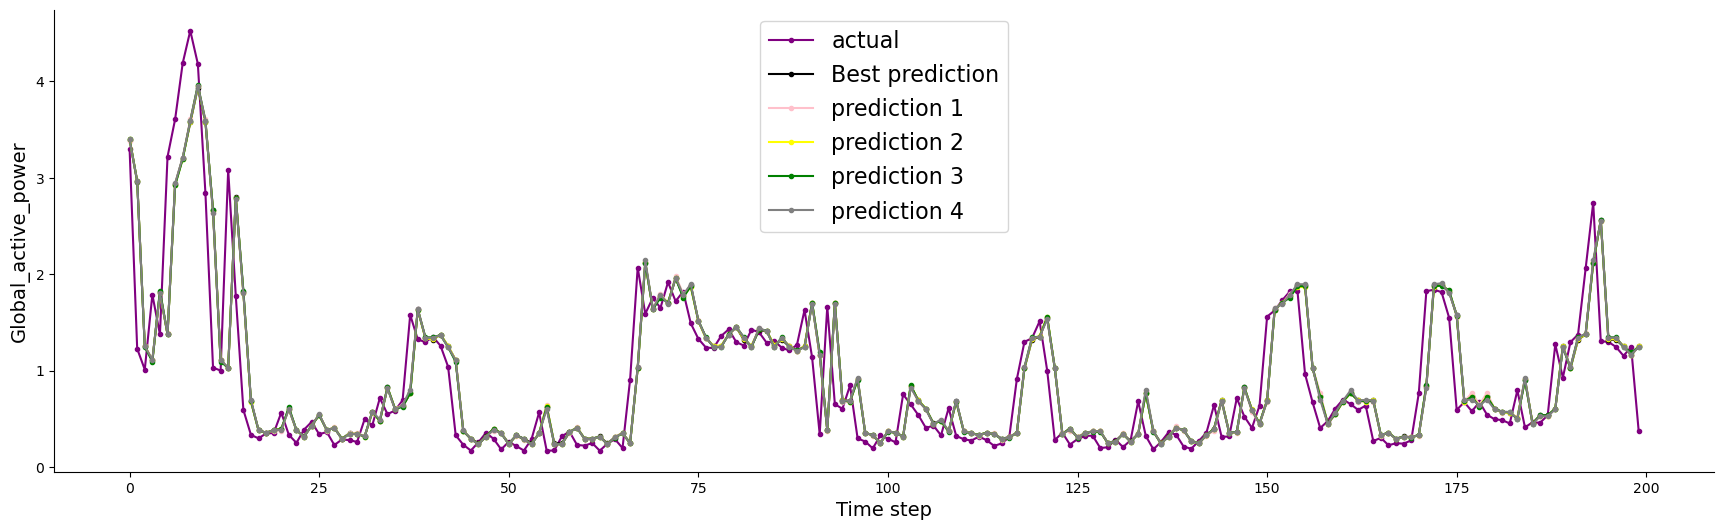

In [134]:
aa=[x for x in range(200)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[:200], marker='.', label="actual", color='purple')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict_1[:200], marker='.', label="Best prediction", color='black')
plt.plot(aa, test_predict[:200], marker='.', label="prediction 1", color='pink')
plt.plot(aa, test_predict_2[:200], marker='.', label="prediction 2", color='yellow')
plt.plot(aa, test_predict_3[:200], marker='.', label="prediction 3", color='green')
plt.plot(aa, test_predict_4[:200], marker='.', label="prediction 4", color='gray')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters = {
    'max_bins': [200,300], 
    'interactions': [25,125],
    'min_samples_leaf': [1,5],
    'max_leaves': [3,4],
    'learning_rate':[0.01,0.02],
    'max_rounds':[5100,5500]}

In [137]:
from sklearn.metrics import accuracy_score

accuracy = mean_squared_error(Y_test, test_predict_1)
print("Mean squared error of the EBM model:", accuracy)
# errors = list()
# for i in range(len(Y_test)):
#  # calculate error
#  err = (Y_test[i] - test_predict[i])**2
#  # store error
#  errors.append(err)
#  # report error
#  #print('>%.1f, %.1f = %.3f' % (Y_test[i], test_predict[i], err))
# # plot errors
# plt.plot(errors)
# plt.xticks(ticks=[i for i in range(len(errors))], labels=test_predict)
# plt.xlabel('Predicted Value')
# plt.ylabel('Mean Squared Error')
# plt.show()

Mean squared error of the EBM model: 0.20573173932759342


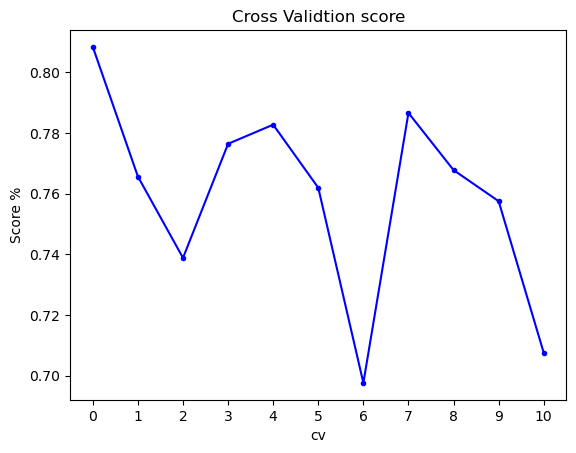

In [181]:
scores = cross_val_score(ebm_1, X_train, Y_train, cv=11)
aa=[x for x in range(11)]
plt.plot(aa, scores, marker='.', label="score", color='blue')
plt.xticks(range(0,11,1))
plt.title('Cross Validtion score')
plt.xlabel('cv')
plt.ylabel('Score %')
plt.show()

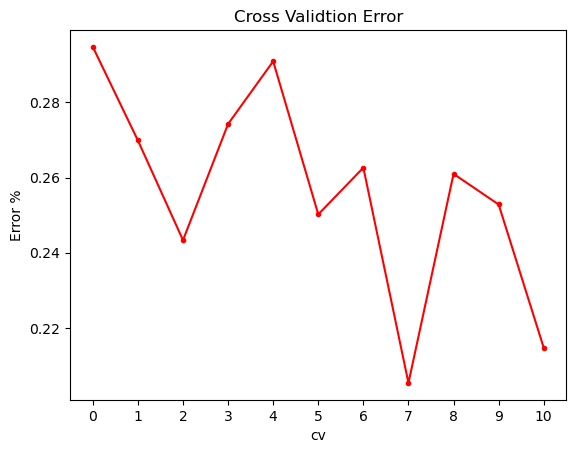

In [182]:
error = -1*cross_val_score(ebm, X_train, Y_train,scoring="neg_mean_squared_error" ,cv=11)
aa=[x for x in range(11)]
plt.plot(aa, error, marker='.', label="error", color='red')
plt.xticks(range(0,11,1))
plt.title('Cross Validtion Error')
plt.xlabel('cv')
plt.ylabel('Error %')
plt.show()

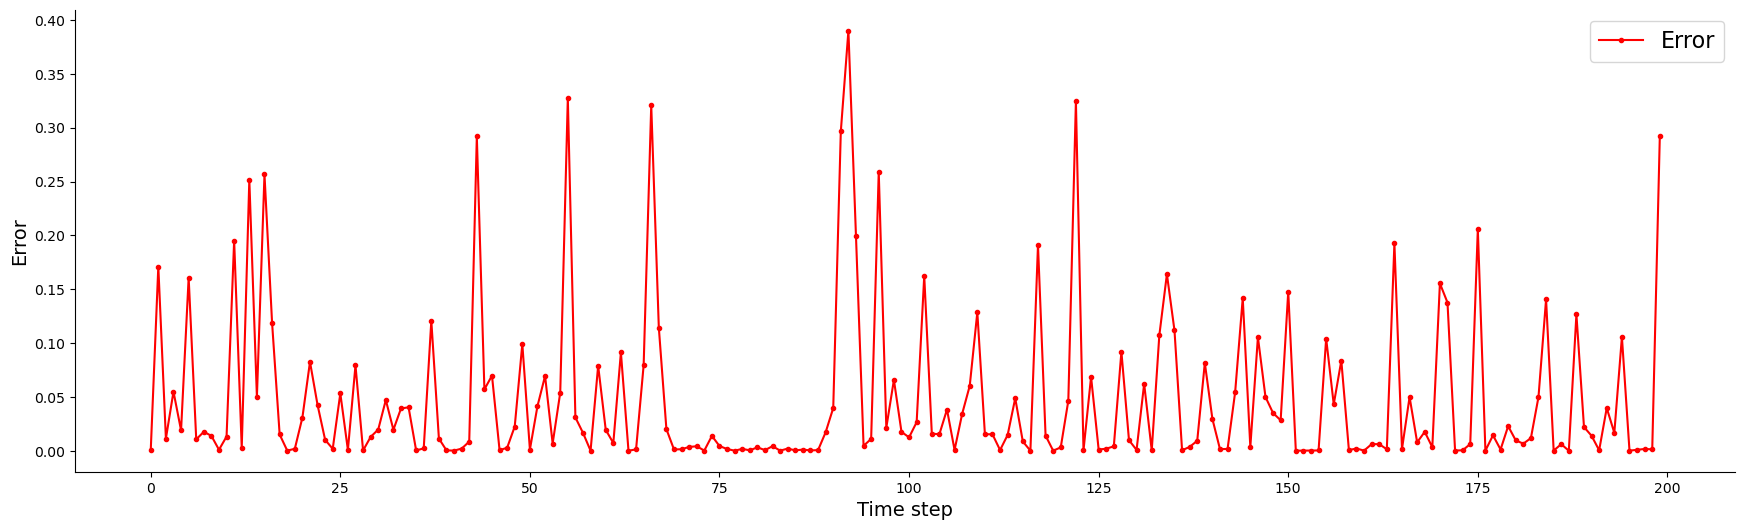

In [151]:
aa=[x for x in range(200)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
errors = list()
for i in range(200):
# calculate error
    err = (Y_test[i] - test_predict_1[i])**2
    err = err/(Y_test[i]+test_predict_1[i])**2
# store error
    errors.append(err)
# report error
# # plot errors
plt.plot(aa, errors, marker='.', label="Error", color='red')


# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Error', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [72]:
from sklearn.model_selection import RandomizedSearchCV
param_test = {'learning_rate': [0.001,0.005,0.01,0.03],
              'interactions': [5,10,15],
              'max_interaction_bins': [10,15,20],
              'max_rounds': [5000,10000,15000,20000],
              'min_samples_leaf': [2,3,5],
              'max_leaves': [3,5,10]}
n_HP_points_to_test=10
ebm = ExplainableBoostingRegressor(random_state=314, n_jobs=-1)
ebm_gs = RandomizedSearchCV(
    estimator=ebm,
    param_distributions=param_test,
    n_iter=n_HP_points_to_test,
    scoring="r2",
    cv=3,
    refit=True,
    random_state=314,
    verbose=False,
)
ebm_gs.fit(X_train, Y_train)

KeyboardInterrupt: 